# Notebook for testing random plotting stuff

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
in_array = np.linspace(-5, 5, 100) 
out_array = np.tanh(in_array) 

bins = np.linspace(-1, 1, 10)

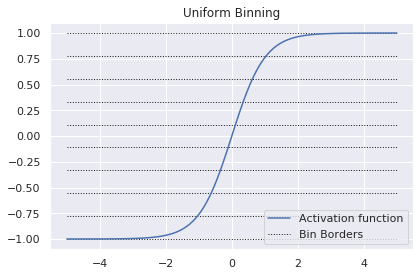

In [3]:
plt.plot(in_array, out_array, label="Activation function") 
plt.title("Uniform Binning") 
plt.xlabel("") 
plt.ylabel("") 
for y in bins[:-1]:
    plt.hlines(y, -5, 5, linewidth=1, linestyles="dotted")
plt.hlines(bins[-1], -5, 5, linewidth=1, linestyles="dotted", label="Bin Borders")
plt.legend(loc="lower right")
plt.tight_layout()
#plt.show()
plt.savefig("uniform_bins.png", dpi=700)

In [4]:
import pickle
with open("../mains/bins.pickle", 'rb') as f:
    bins_ars = pickle.load(f)
    f.close()
    
adapt_bins = bins_ars[-3000][-2]

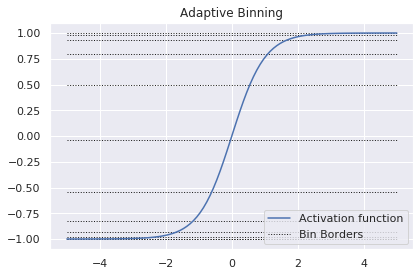

In [5]:
plt.plot(in_array, out_array, label="Activation function") 
plt.title("Adaptive Binning") 
plt.xlabel("") 
plt.ylabel("") 

for y in adapt_bins[:-1]:
    plt.hlines(y, -5, 5, linewidth=1, linestyles="dotted")
plt.hlines(adapt_bins[-1], -5, 5, linewidth=1, linestyles="dotted", label="Bin Borders")
plt.legend(loc="lower right")
plt.tight_layout()
#plt.show() 
plt.savefig("adaptive_bins.png", dpi=700)

In [8]:
with open("../data/max_val_folder/max_values9_256.pickle", 'rb') as f:
    max_vals = pickle.load(f)
    f.close()

In [9]:
max_vals = np.array(max_vals)

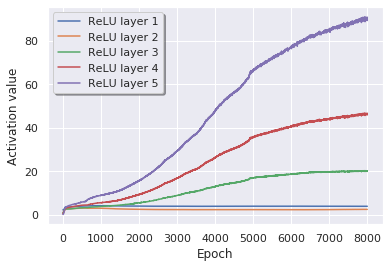

In [10]:
fig = plt.figure()
ax = plt.subplot(111)
for idx, i in enumerate(max_vals.T[:-1]):
    ax.plot(i, label = "ReLU layer {}".format(idx+1))
ax.set_xlabel("Epoch")
ax.set_ylabel("Activation value")

ax.legend(loc="best",fancybox=True, shadow=True)

In [11]:
fig.savefig("act_layers.png")

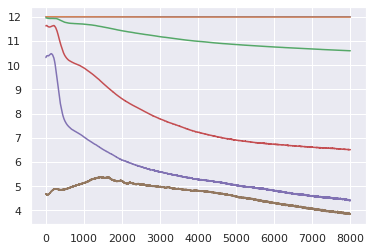

In [15]:
RANGE = 40
ext = "full"
data_path = "../data/tanh_adaptive_30_/"
full_error_train = np.zeros(RANGE,  dtype=object)
full_error_test = np.zeros(RANGE,  dtype=object)
for i in range(RANGE):
	with open(data_path + 'training_history_run_{}_{}.pickle'.format(i,ext), 'rb') as f:
		error_train, error_test = pickle.load(f)
		full_error_train[i] = np.array(error_train)
		full_error_test[i] = np.array(error_test)

avg_error_train = np.mean(full_error_train, axis = 0)
avg_error_test = np.mean(full_error_test, axis = 0)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(np.arange(len(avg_error_test)), avg_error_train)
fig.show()